# **Bike Price Prediction Using Linear Regression**

**Import Libraries**

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [202]:
bike = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

**Explore Data**

In [203]:
bike.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [204]:
bike.shape

(1061, 8)

In [205]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [206]:
bike.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [207]:
bike.dtypes

Brand                 object
Model                 object
Selling_Price          int64
Year                   int64
Seller_Type           object
Owner                 object
KM_Driven              int64
Ex_Showroom_Price    float64
dtype: object

**Identifying and Removing Missing Values**

In [208]:
bike.isnull()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1056,False,False,False,False,False,False,False,True
1057,False,False,False,False,False,False,False,True
1058,False,False,False,False,False,False,False,True
1059,False,False,False,False,False,False,False,True


In [209]:
bike = bike.dropna()

In [210]:
bike.isnull()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
621,False,False,False,False,False,False,False,False
622,False,False,False,False,False,False,False,False
623,False,False,False,False,False,False,False,False
624,False,False,False,False,False,False,False,False


In [211]:
bike.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

**Data Preprocessing**

In [212]:
# Adding Age Column
bike['Age'] = 2024 - bike['Year']
bike.drop('Year', axis=1, inplace=True)

In [213]:
bike.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
0,TVS,TVS XL 100,30000,Individual,1st owner,8000,30490.0,7
1,Bajaj,Bajaj ct 100,18000,Individual,1st owner,35000,32000.0,7
2,Yo,Yo Style,20000,Individual,1st owner,10000,37675.0,13
3,Bajaj,Bajaj Discover 100,25000,Individual,1st owner,43000,42859.0,14
4,Bajaj,Bajaj Discover 100,24999,Individual,2nd owner,35000,42859.0,12


**Outlier Visualization**

<Axes: >

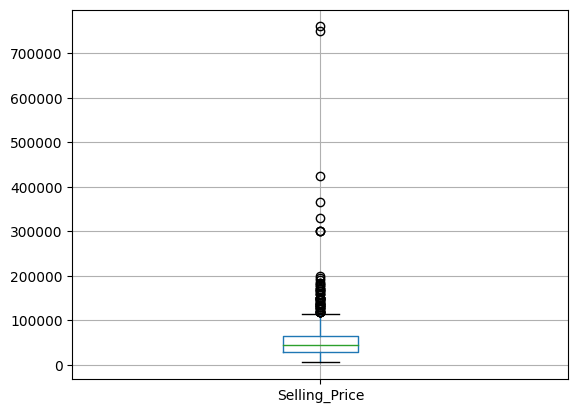

In [214]:
bike.boxplot(['Selling_Price'])

<Axes: >

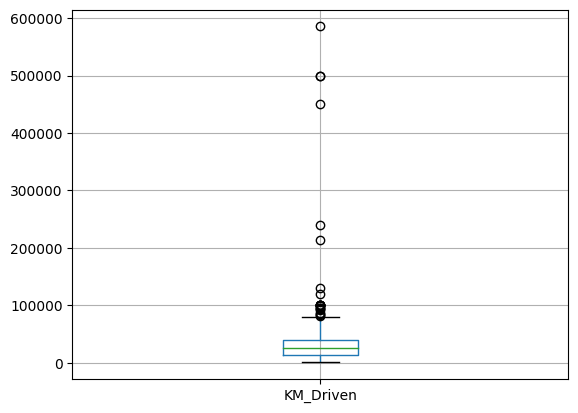

In [215]:
bike.boxplot(['KM_Driven'])

<Axes: >

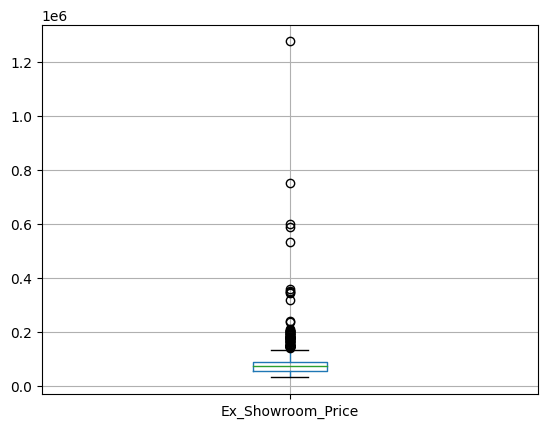

In [216]:
bike.boxplot(['Ex_Showroom_Price'])

<Axes: >

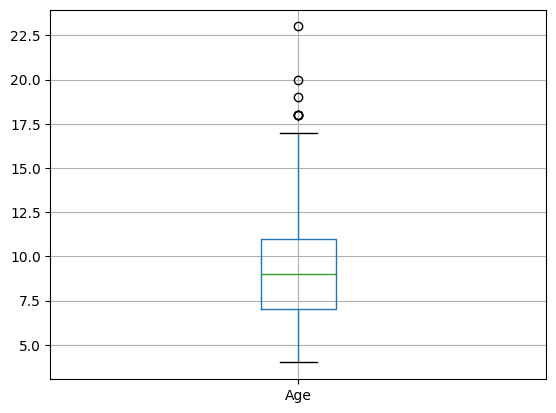

In [217]:
bike.boxplot(['Age'])

In [218]:
bike1 = bike.copy()
bike1.shape

(626, 8)

In [219]:
numeric_cols = bike1.select_dtypes(include=[float, int]).columns

**Calculating quantiles for each feature**

In [220]:
Q1 = bike1[numeric_cols].quantile(0.25)
Q3 = bike1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

Selling_Price        35000.00
KM_Driven            26968.75
Ex_Showroom_Price    32179.50
Age                      4.00
dtype: float64

**Identifying and Removing Outliers**

In [221]:
outliers = bike1[((bike1[numeric_cols] < (Q1 - 1.5 * IQR)) | (bike1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
5,Bajaj,Bajaj Discover 100,20000,Individual,1st owner,85000,42859.0,12
21,TVS,TVS Star City,15000,Individual,1st owner,40000,46575.0,18
28,TVS,TVS Star City,21000,Individual,1st owner,101000,47108.0,13
40,Hero,Hero Maestro,50000,Individual,1st owner,100000,49412.0,8
48,Honda,Honda Activa [2000-2015],22989,Individual,1st owner,500000,50267.0,12


In [222]:
out = bike1[~((bike1[numeric_cols] < (Q1 - 1.5 * IQR)) | (bike1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
bike = out.copy()
out.shape

(518, 8)

**Data Visualization**

<ipython-input-223-2e7a24a972ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type', y='Selling_Price', data=bike, palette='muted')
<ipython-input-223-2e7a24a972ff>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner', y='Selling_Price', data=bike, palette='muted')


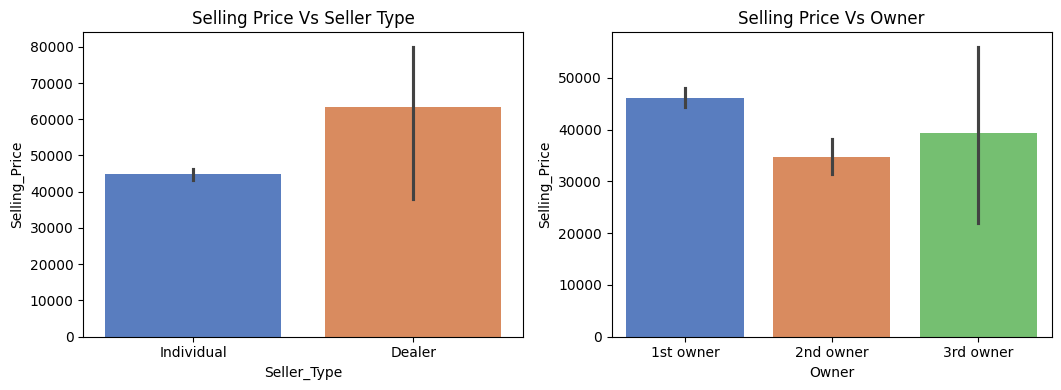

In [223]:
# Seller Type and Owner Visualization with target variable
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.barplot(x='Seller_Type', y='Selling_Price', data=bike, palette='muted')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Owner', y='Selling_Price', data=bike, palette='muted')
plt.title('Selling Price Vs Owner')

plt.tight_layout()
plt.show()

<ipython-input-224-48cfb48c1166>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Selling_Price', data=bike, palette='colorblind')


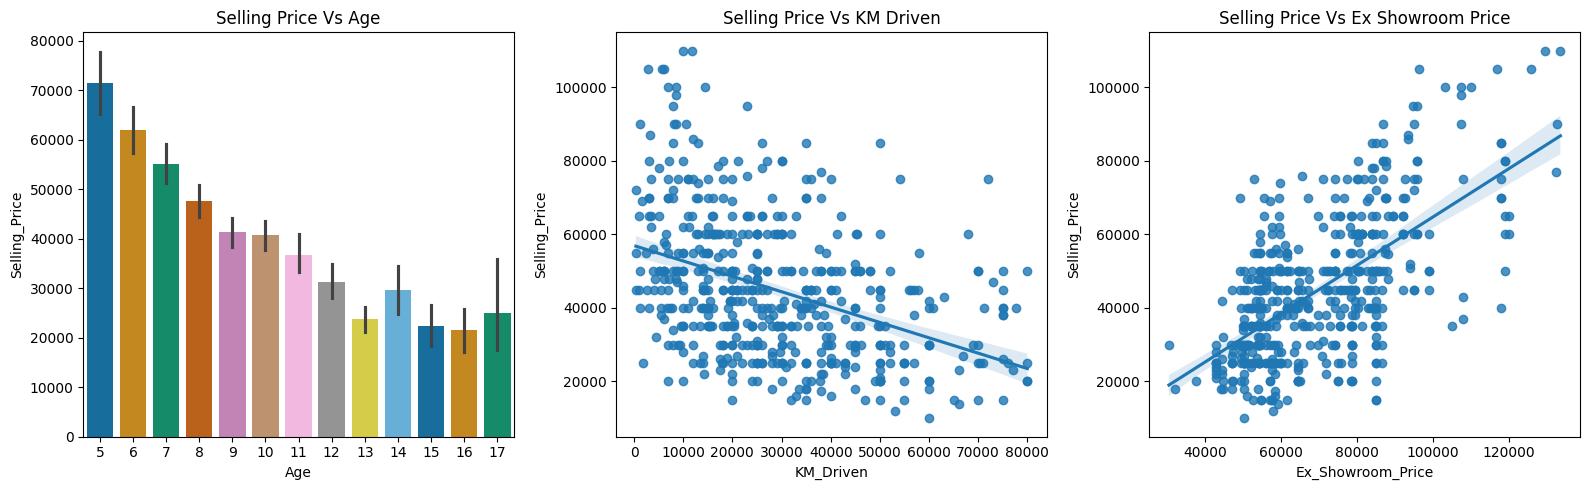

In [224]:
# Ex_Showroom_Price, Age, KM Driven Visualization with target variable
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sns.barplot(x='Age', y='Selling_Price', data=bike, palette='colorblind')
plt.title('Selling Price Vs Age')

plt.subplot(1,3,2)
sns.regplot(x='KM_Driven', y='Selling_Price', data=bike)
plt.title('Selling Price Vs KM Driven')

plt.subplot(1,3,3)
sns.regplot(x='Ex_Showroom_Price', y='Selling_Price', data=bike)
plt.title('Selling Price Vs Ex Showroom Price')

plt.tight_layout() # Adjust layout and display plots
plt.show()

**Encoding of Categorical Features**

In [225]:
bike.head()

,Brand,Model,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
0,TVS,TVS XL 100,30000,Individual,1st owner,8000,30490.0,7
1,Bajaj,Bajaj ct 100,18000,Individual,1st owner,35000,32000.0,7
2,Yo,Yo Style,20000,Individual,1st owner,10000,37675.0,13
3,Bajaj,Bajaj Discover 100,25000,Individual,1st owner,43000,42859.0,14
4,Bajaj,Bajaj Discover 100,24999,Individual,2nd owner,35000,42859.0,12


In [226]:
bike = bike.drop(['Brand','Model'], axis=1)

In [227]:
bike.replace({'Seller_Type':{'Individual':0, 'Dealer':1}},inplace=True)
bike['Seller_Type'].unique()

array([0, 1])

In [228]:
bike.replace({'Owner':{'1st owner':0, '2nd owner':1, '3rd owner':2}},inplace=True)
bike['Owner'].unique()

array([0, 1, 2])

In [229]:
bike.head()

,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
0,30000,0,0,8000,30490.0,7
1,18000,0,0,35000,32000.0,7
2,20000,0,0,10000,37675.0,13
3,25000,0,0,43000,42859.0,14
4,24999,0,1,35000,42859.0,12


**Correlation Visualization**

In [230]:
corr_matrix = bike.corr()
corr_matrix

,Selling_Price,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price,Age
Selling_Price,1.000000,0.073338,-0.176159,-0.404836,0.634498,-0.653761
Seller_Type,0.073338,1.000000,-0.026184,-0.058955,0.076850,-0.014916
Owner,-0.176159,-0.026184,1.000000,0.067761,-0.064606,0.152061
KM_Driven,-0.404836,-0.058955,0.067761,1.000000,-0.065796,0.517317
Ex_Showroom_Price,0.634498,0.076850,-0.064606,-0.065796,1.000000,-0.136442
Age,-0.653761,-0.014916,0.152061,0.517317,-0.136442,1.000000


<Axes: >

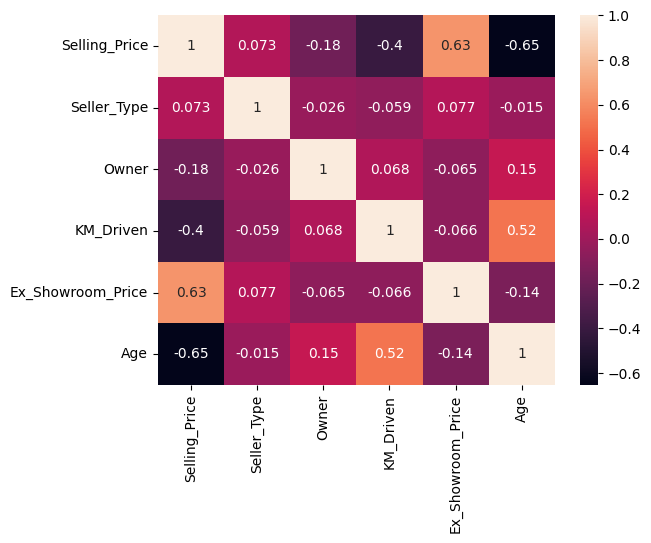

In [231]:
sns.heatmap(corr_matrix, annot=True)

**Define Target Variable (y) and Feature Variables (X)**

In [232]:
bike.columns

Index(['Selling_Price', 'Seller_Type', 'Owner', 'KM_Driven',
       'Ex_Showroom_Price', 'Age'],
      dtype='object')

In [233]:
Y = bike['Selling_Price']
X = bike.drop(['Selling_Price'], axis=1)

**Train Test Split**

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [236]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((362, 5), (156, 5), (362,), (156,))

**Modelling**

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
model = LinearRegression()

In [239]:
model.fit(X_train, Y_train)

LinearRegression()

In [240]:
model.intercept_

38791.414322563396

In [241]:
model.coef_

array([ 2.56210908e+01, -2.53810874e+03, -9.68007049e-02,  5.70484097e-01,
       -3.33206836e+03])

**Prediction**

In [242]:
Y_pred = model.predict(X_test)

In [243]:
Y_pred

array([54924.13324832, 17354.43408782, 46811.71991538, 41780.59425884,
       54327.40596089, 58647.05942264, 22240.11195955, 35666.6690446 ,
       67146.15842907, 39775.70794258, 28517.56513127, 54671.48846932,
       54011.43468246, 36469.2578311 , 81483.43429956, 49426.31060617,
       38970.10516639, 35634.87076363, 55159.17220734, 82589.08644724,
       45139.63216363, 41645.31287604, 43586.97389369, 32052.18013495,
       35586.97766486, 26920.28678628, 21611.31064328, 29151.71043747,
       26879.39310353, 59135.47142688, 51092.72039731, 35686.1481134 ,
       51905.36441495, 58449.80301959, 47388.37465778, 26510.23661785,
       45950.62499163, 46443.91614194, 80285.56083085, 23755.68181395,
       57244.26636323, 37654.56627629, 55739.976437  , 43393.9737702 ,
       61592.94708681, 28537.92336659, 33742.31629316, 45824.67725768,
       45980.02654326, 38018.0691102 , 29120.72227217, 24869.70708308,
       47963.76053438, 74163.26820089, 41022.93974277, 61859.48977224,
      

In [244]:
Y_pred.shape

(156,)

**Model Evaluation**

In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [246]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  90766393.23757812


In [247]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  7446.214888691434


In [248]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  0.755586197424423


**Actual vs Predicted Results**

In [249]:
result = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
result

,Actual,Predicted
0,50000,54924.133248
1,20000,17354.434088
2,30000,46811.719915
3,50000,41780.594259
4,40000,54327.405961
...,...,...
151,35000,32408.629872
152,24000,24633.422908
153,35000,35643.642088
154,22000,32698.445968


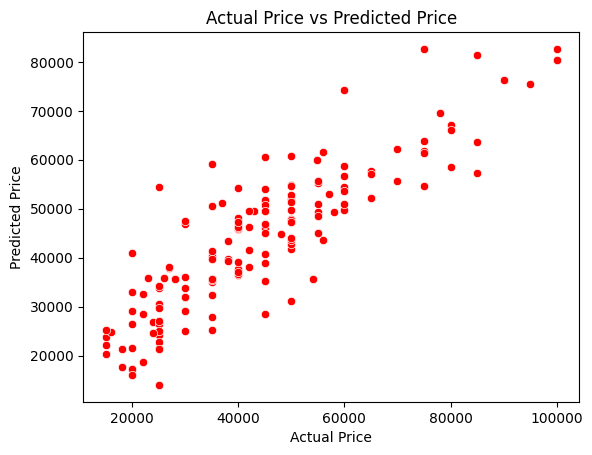

In [250]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()